# **ACIDENTES DE TRÂNSITO NAS RODOVIAS BRASILEIRAS NO PRIMEIRO TRIMESTRE DE 2020.**

![title](sunlight-flares-in-an-image-of-a-highway.jpg)

## **A cada ano, a vida de aproximadamente 1,35 milhão de pessoas é interrompida devido a um acidente de trânsito. Entre 20 e 50 milhões de pessoas sofrem lesões não fatais, muitas delas resultando em incapacidade.**

## **As lesões ocorridas no trânsito provocam perdas econômicas consideráveis para os indivíduos, suas famílias e países como um todo. Essas perdas decorrem dos custos com tratamentos (incluindo reabilitação e investigação do acidente), bem como da redução/perda de produtividade. Os acidentes de trânsito custam à maioria dos países 3% do seu produto interno bruto (PIB).**

## Fonte : [OPAS/OMS-BRASIL](https://www.paho.org/bra/index.php?option=com_content&view=article&id=5147:acidentes-de-transito-folha-informativa&Itemid=779#:~:text=Cerca%20de%201%2C35%20milh%C3%A3o,decorr%C3%AAncia%20de%20acidentes%20no%20tr%C3%A2nsito%3B&text=As%20les%C3%B5es%20ocorridas%20no%20tr%C3%A2nsito,de%205%20a%2029%20anos.)

# *Pensando no problema vivido por muitos brasileiros nestas estradas que cortam todo país, surgiu a vontade de analisar os dados referentes a estes acidentes com o intuito de encontrar informações que possam a vir ajudar a identificar possíveis melhorias para estes indicadores, diminuindo as possibilidades de acidentes.*

**Fonte dos dados encontra-se no seguinte link:**
[PRF](https://portal.prf.gov.br/dados-abertos)

# PERGUNTAS PARA RESPONDER ANALISANDO OS DADOS :

### ▪ 1 - Quantas pessoas morreram neste período, nas rodovias ?

### ▪ 2 - Quais são os estados com mais mortes ?

### ▪ 3 - Quais são as principais causas de acidentes nas rodovias no primeiro trimestre do ano de 2020 ?

### ▪ 4 - Quais são as condições climáticas onde mais ocorreram acidentes com vítimas fatais ?

### ▪ 5 - Quais são as distribuições de óbitos por horários em relação aos acidentes ?

### ▪ 6 - Quais as distribuições de óbitos por rodovias ?

### ▪ 7 - Visualizar os dados referentes a Salvador.

# **PLANEJAMENTO**
### **Utilizarei as seguintes ferramentas e conceitos:**

▪**Linguagem de programação Python**

▪**Pacotes de manipulação, análise e visualização de dados.**

▪**O produto final será um relatório e um dashboard em formato HTML**

# **CAIXA DE FERRAMENTAS**

In [1]:
# Manipulação de dados 
import pandas as pd 

# Visualização de dados 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use="ggplot"
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px 
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
py.init_notebook_mode(connected=True)

# Renderização
pd.options.display.max_columns = None
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Ignora avisos 
import warnings 
warnings.filterwarnings('ignore')

# **EXTRAÇÃO**

In [2]:
# Lendo o arquivo csv
df = pd.read_csv ("datatran2020.csv",sep=";",encoding="ISO-8859-1")

In [3]:
# Visualização das primeiras linhas da tabela 
display(df)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Não,5,0,0,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038,2020-01-01,quarta-feira,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,1,0,0,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Simples,Curva,Não,6,0,2,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15703,281385,2020-03-16,segunda-feira,06:48:00,MT,364.0,198,RONDONOPOLIS,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Feridas,Pleno dia,Decrescente,Ignorado,Dupla,Curva,Sim,1,0,0,1,0,0,1,1,"-16,49782","-54,63598",SR-MT,UOP01,DEL02
15704,281424,2020-02-09,domingo,20:15:00,RJ,116.0,137,DUQUE DE CAXIAS,Falta de Atenção à Condução,Atropelamento de Pedestre,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Viaduto,Sim,2,0,0,1,0,1,1,1,"-22,64792","-43,18201",SR-RJ,UOP02,DEL04
15705,281526,2020-03-29,domingo,23:00:00,BA,235.0,"26,7",PEDRO ALEXANDRE,Ingestão de Álcool,Colisão frontal,Com Vítimas Fatais,Plena Noite,Crescente,Chuva,Simples,Curva,Não,5,3,1,0,0,1,1,2,"-10,16386","-37,91485",SR-SE,UOP02,DEL01
15706,281548,2020-03-27,sexta-feira,15:20:00,SP,116.0,"550,9",BARRA DO TURVO,Velocidade Incompatível,Tombamento,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,1,1,0,0,0,0,0,1,"-24,9575","-48,46441",SR-SP,UOP02,DEL05


# **TRANSFORMAÇÃO**

In [4]:
# Verificando dados nulos 
df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                         26
km                         26
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                   0
uop                       396
dtype: int64

In [5]:
# Verificando se há dado duplicado 
df.duplicated().sum()

0

In [6]:
# Estatísticas descritivas de cada atributo
df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,15708.00000,15682.000000,15708.000000,15708.000000,15708.000000,15708.000000,15708.000000,15708.000000,15708.000000,15708.000000
mean,269136.58728,213.320750,2.414693,0.075121,0.929654,0.264515,0.998599,0.146804,1.194169,1.630889
std,5211.91467,132.104677,2.067319,0.324834,1.138839,0.627866,1.599245,0.429796,1.274853,0.730333
min,260031.00000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,264623.75000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,269219.50000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,273622.25000,343.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,281571.00000,495.000000,73.000000,11.000000,38.000000,17.000000,73.000000,11.000000,39.000000,12.000000


In [7]:
print(f'Data inicial dos registros: {df.data_inversa.min ()}')
print(f'Data final dos registros: {df.data_inversa.max ()}')

Data inicial dos registros: 2020-01-01
Data final dos registros: 2020-03-31


# **ANÁLISE EXPLORATÓRIA**

# *1 - Quantas pessoas morreram neste período, nas rodovias ?*

In [8]:
# Numéro de mortos neste período
print(f'Número de mortos nos três primeiros meses de 2020 nas rodovias federais: {df.mortos.sum()}')

Número de mortos nos três primeiros meses de 2020 nas rodovias federais: 1180


# 2 - *Quais são os estados com mais mortes ?*

In [9]:
# Agrupando estados por número de mortos
mortos_uf = df.groupby(
    by="uf")["mortos"].sum().to_frame().reset_index().sort_values(
        by='mortos', ascending=True)
mortos_uf

,uf,mortos
3,AP,1
2,AM,2
0,AC,4
6,DF,7
24,SE,9
21,RR,13
1,AL,14
20,RO,15
14,PB,17
19,RN,21


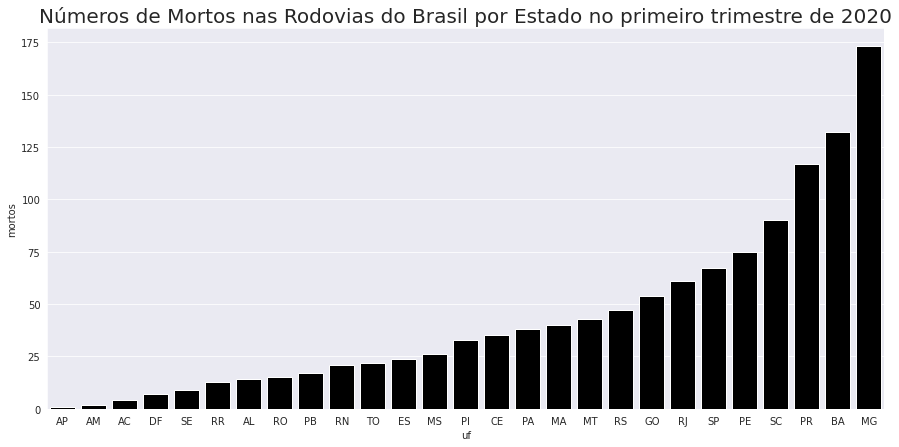

In [10]:
# figura do tipo gráfico de barras
plt.figure(figsize=(15, 7))
sns.barplot(data=mortos_uf, x='uf', y='mortos', color='Black')
plt.title(
    "Números de Mortos nas Rodovias do Brasil por Estado no primeiro trimestre de 2020",
    fontsize=20);

# 3 - *Quais são as principais causas de acidentes nas rodovias no primeiro trimestre do ano de 2020 ?*

In [11]:
# Causas de acidentes agrupadas por contagens de frequências
causa_acidente = df.causa_acidente.value_counts().to_frame().reset_index()

In [12]:
# Ordenando do maior para o menor a tabela 
causa_acidente.sort_values(by='causa_acidente',ascending = False,inplace=True)

In [13]:
causa_acidente 

,index,causa_acidente
0,Falta de Atenção à Condução,5277
1,Desobediência às normas de trânsito pelo condutor,1976
2,Velocidade Incompatível,1528
3,Ingestão de Álcool,1220
4,Defeito Mecânico no Veículo,942
5,Não guardar distância de segurança,934
6,Pista Escorregadia,702
7,Condutor Dormindo,618
8,Falta de Atenção do Pedestre,438
9,Animais na Pista,388


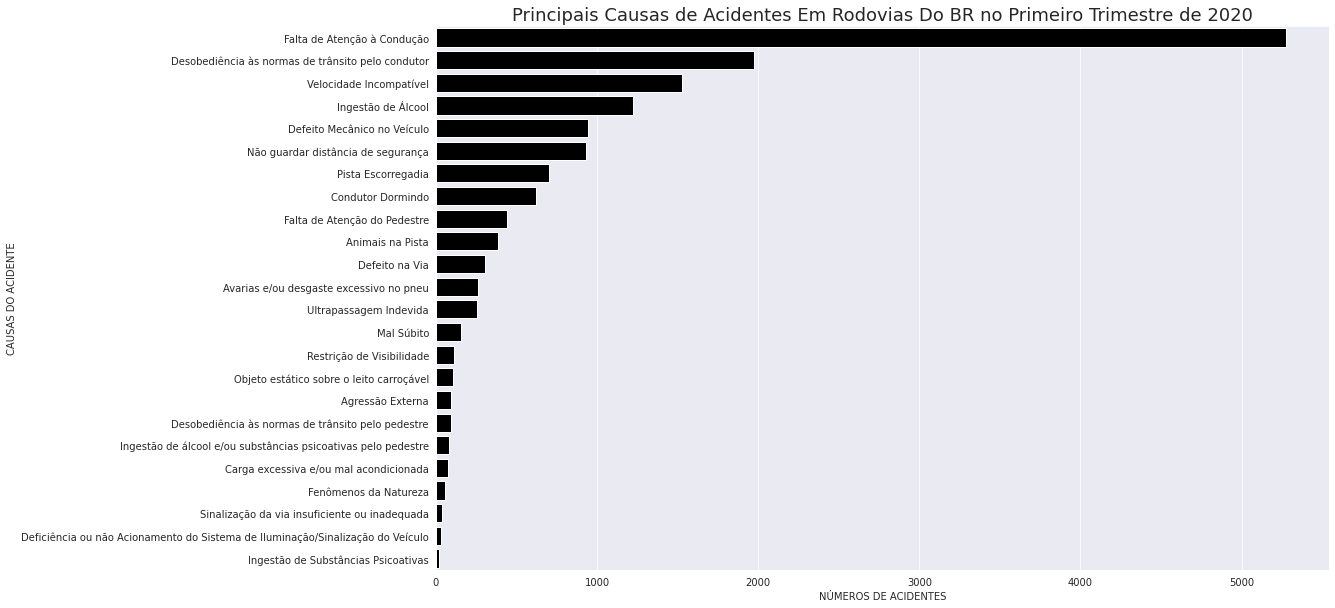

In [14]:
# Gráfico de barras invertido 
plt.figure(figsize=(16, 10))
sns.barplot(y=causa_acidente["index"], x=causa_acidente["causa_acidente"],color='Black')
plt.ylabel("CAUSAS DO ACIDENTE")
plt.xlabel("NÚMEROS DE ACIDENTES")
plt.title(
    "Principais Causas de Acidentes Em Rodovias Do BR no Primeiro Trimestre de 2020",
    fontsize=18)
plt.show()

# 4 - *Quais são as condições climáticas onde mais ocorreram acidentes com vítimas fatais ?*

In [15]:
clima_mortos = df.groupby(by="condicao_metereologica")["mortos"].sum().to_frame().reset_index().sort_values(by='mortos',ascending=False)
clima_mortos

,condicao_metereologica,mortos
1,Céu Claro,605
0,Chuva,242
5,Nublado,212
6,Sol,52
2,Garoa/Chuvisco,46
3,Ignorado,16
4,Nevoeiro/Neblina,7
7,Vento,0


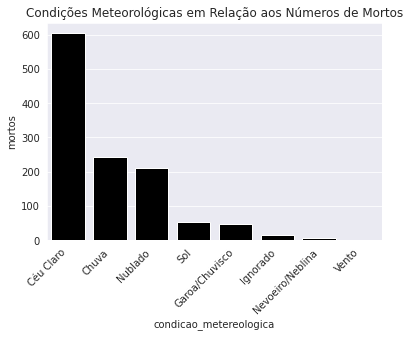

In [16]:
# Agrupando condições meteorológicas por mortos
sns.barplot(x = clima_mortos['condicao_metereologica'], y=clima_mortos['mortos'],color='Black')
plt.xticks(rotation=45, ha="right")
plt.title("Condições Meteorológicas em Relação aos Números de Mortos",fontsize=12);

# *Quais foram as distribuições diárias por mortes em relação aos acidentes?*

In [18]:
# Agrupando dias da semana por número de mortos 
mortos_dia = df.groupby(by="dia_semana")["mortos"].sum().to_frame().reset_index().sort_values(by="mortos",ascending=True)
print(mortos_dia)

      dia_semana  mortos
6    terça-feira     126
1   quarta-feira     136
2   quinta-feira     138
3  segunda-feira     146
4    sexta-feira     174
5         sábado     191
0        domingo     269


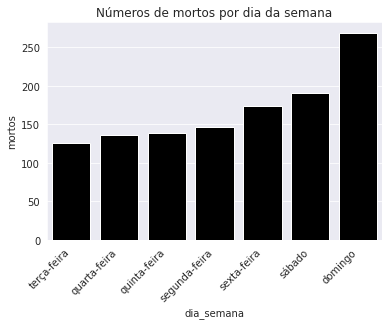

In [19]:
# Gráfico de barras dias da semana por quantidade de mortos
sns.barplot(data=mortos_dia,x="dia_semana",y="mortos",color='Black')
plt.title("Números de mortos por dia da semana")
plt.xticks(rotation=45,ha="right");

#  5 - *Quais são as  distribuições de óbitos por horários em relação aos acidentes ?*

In [20]:
# Agrupando horário do acidente pelos números de mortos
hor_mort = df.groupby(
    by="horario")["mortos"].sum().to_frame().reset_index().sort_values(
        by="mortos")

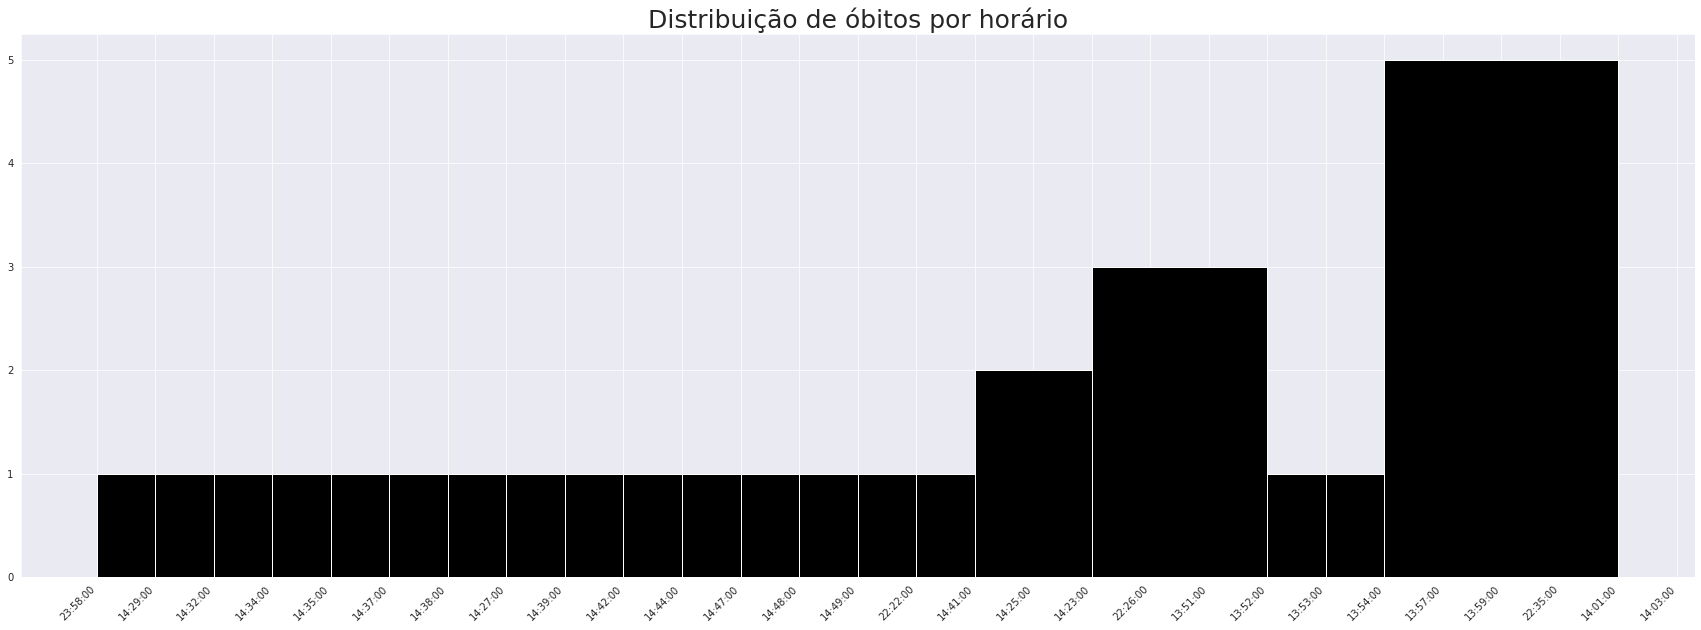

In [21]:
# distribuições de mortes por horario do acidente
plt.figure(figsize=(30, 10))
plt.hist(hor_mort['horario'], hor_mort['mortos'], color="k")
plt.xticks(rotation=45, ha="right")
plt.title("Distribuição de óbitos por horário", fontsize=25);

# 6 - *Quais as distribuições de óbitos por rodovias ?*

In [22]:
# Agrupando rodovias por número de mortos
br_mortos = df.groupby(
    by="br")["mortos"].sum().to_frame().reset_index().sort_values(
        by="mortos", ascending=False)
# Seleção apenas das rodovias contendo acidentes com óbitos
br_mortos = br_mortos[br_mortos["mortos"] > 0]

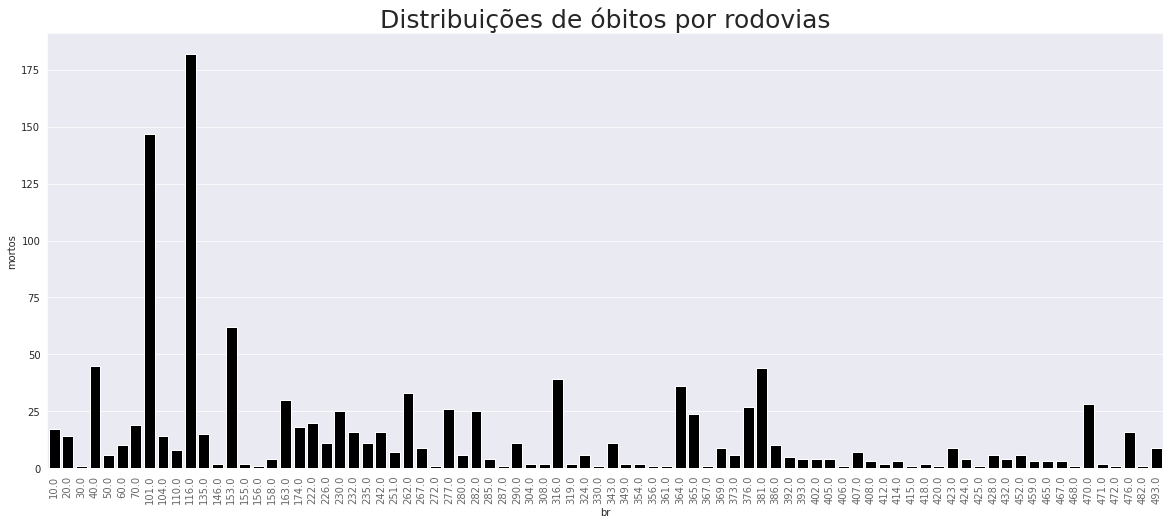

In [23]:
# Gráfico de barras mortos por rodovias
plt.figure(figsize=(20, 8))
sns.barplot(data=br_mortos, x="br", y="mortos", color='Black')
plt.xticks(rotation=90, alpha=0.7)
plt.title("Distribuições de óbitos por rodovias", fontsize=25);

# 7 - *Visualizar os dados referentes a capital da Bahia, Salvador*

In [24]:
# Filtrando dados da cidade de Salvador 
salvador_ba = df.loc[df.municipio=="SALVADOR"]
salvador_ba.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
20,260061,2020-01-01,quarta-feira,03:00:00,BA,324.0,616,SALVADOR,Falta de Atenção à Condução,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Sim,2,0,2,0,0,0,2,1,"-12,87957905","-38,43213893",SR-BA,DEL10/1,UOP01/BA
392,260492,2020-01-03,sexta-feira,01:45:00,BA,324.0,625,SALVADOR,Agressão Externa,Colisão transversal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Múltipla,Reta,Sim,2,0,1,0,1,0,1,2,"-12,94194706","-38,47081224",SR-BA,DEL10/1,UOP01/BA
1130,261352,2020-01-07,terça-feira,13:00:00,BA,324.0,623,SALVADOR,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Sim,2,0,1,0,1,0,1,2,"-12,92629","-38,46839",SR-BA,DEL10/1,UOP01/BA
1578,261881,2020-01-10,sexta-feira,11:00:00,BA,NaN,NaN,SALVADOR,Falta de Atenção à Condução,Colisão traseira,Sem Vítimas,Pleno dia,Não Informado,Céu Claro,Simples,Reta,Sim,2,0,0,0,2,0,0,2,"-12,92276","-38,46212",SR-BA,DEL10/1,UOP01/BA
2104,262479,2020-01-13,segunda-feira,02:20:00,BA,324.0,621,SALVADOR,Desobediência às normas de trânsito pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,2,0,1,0,1,0,1,2,"-12,91234","-38,45957",SR-BA,DEL10/1,UOP01/BA


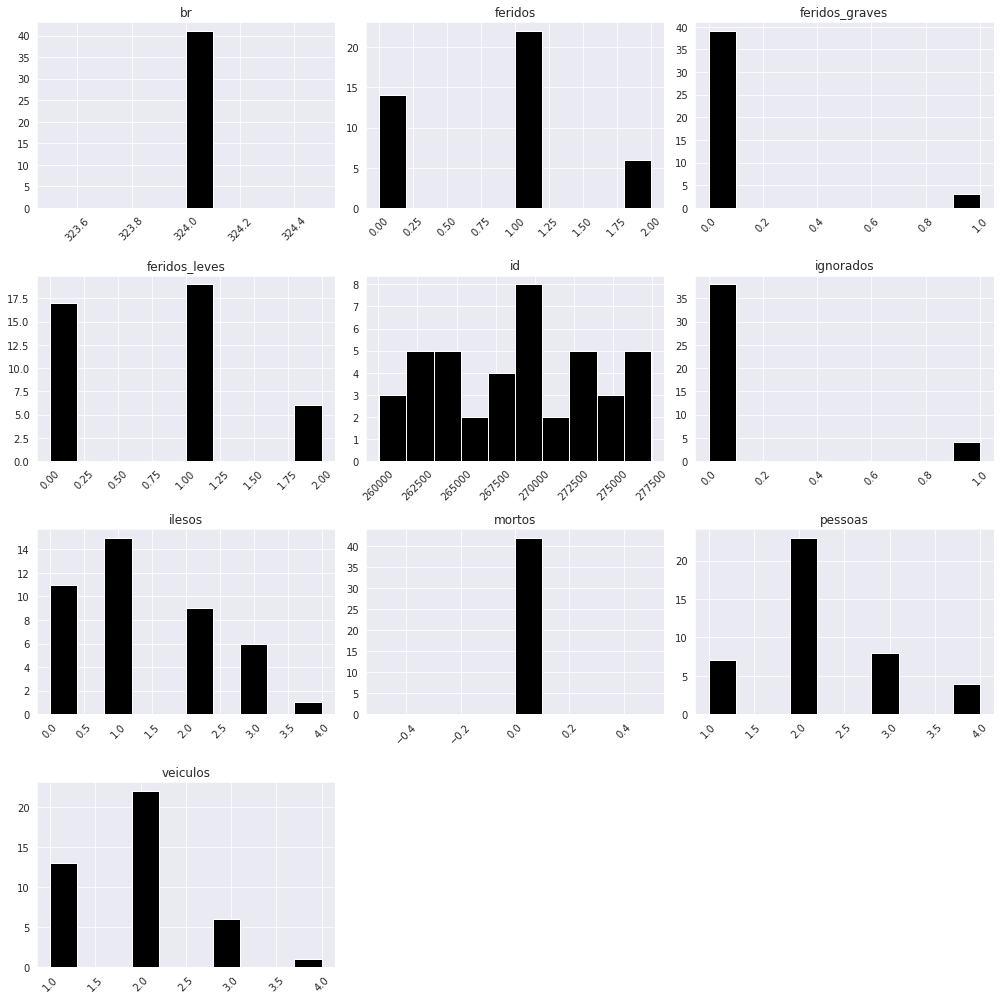

In [25]:
# Histograma dados numéricos de Salvador em relação aos acidentes ocorridos 
salvador_ba.hist(figsize=(14,14),xrot=45,color='k')
plt.tight_layout();

# **PLOTLY DASHBOARD**

In [26]:
#
fig = make_subplots(
    rows=3,
    cols=2,
    subplot_titles=('Numéro de mortos por estado',
                    'Principais causas dos acidentes',
                    'Condição meteorológica por número de mortos',
                    'Horário do acidente por número de mortos',
                    'Rodovias por número de mortos',
                    'Causas de acidentes por feridos em Salvador'),
    shared_yaxes=True)

fig.add_trace(
    go.Bar(x=mortos_uf['uf'],
           y=mortos_uf['mortos'],
           marker=dict(color='Black')), 1, 1)

fig.add_trace(
    go.Bar(x=causa_acidente['causa_acidente'],
           y=causa_acidente['index'],
           marker=dict(color='Black')), 1, 2)

fig.add_trace(
    go.Bar(x=clima_mortos['condicao_metereologica'],
           y=clima_mortos['mortos'],
           marker=dict(color='Black')), 2, 1)

fig.add_trace(
    go.Scatter(x=hor_mort['horario'],
               y=hor_mort['mortos'],
               mode = 'markers',
               marker=dict(color='Black')), 2, 2)

fig.add_trace(
    go.Bar(x=br_mortos['br'],
           y=br_mortos['mortos'],
           marker=dict(color='Black')), 3, 1)

fig.add_trace(
    go.Bar(x=salvador_ba['causa_acidente'],
           y=salvador_ba['feridos'],
           marker=dict(color='Black')), 3, 2)

fig.update_layout(
    height=1000,
    width=800,
    title_text=
    "Relatório - Acidentes de trânsito por rodovias federais do Brasil primeiro trimestre de 2020"
)
fig.show()

# **CARGA**

In [27]:
# Salvando o Dashboard em formato HTML 
fig.write_html("Dashboard.html")

# *Feedbacks :*

## *Número de mortos nos três primeiros meses de 2020 nas rodovias federais brasileiras: 1180*

## *Minas Gerais, Bahia e Paraná foram os estados com mais mortes, é importante tomar decisões sobre a qualidade das rodovias e a educação ao volante.*

## *As principais causas dos acidentes são;  Falta de Atenção à Condução, Desobediência às normas de trânsito pelo condutor, Velocidade Incompatível e Ingestão de Álcool.*

## *Em relação as condições meteorológicas, em 605 óbitos dos 1180 ao todo, o clima estava em céu claro.*

## *O dia da semana onde os acidentes que resultaram em óbitos foram mais frequentes  foi o domingo.

## *Os horários a seguir chegam a apresentar cerca de 50% das mortes: 13:57:00, 13:59:00, 22:35:00, 14:01:00, 14:03:00, percebemos que são horários de volta para casa para o almoço ou troca de turno, e no período noturno também para volta ao domicílio e jantar. 

## *As rodovias mais perigosas foram as 101 e 116 contendo números elevados de mortos em acidentes.*

## *Em Salvador os acidentes foram pouco mais 40, com a principal causa sendo falta de atenção a condução.*

# * É imprescindível a responsabilidade, atenção e respeito as normas e condutas de leis quando se está dirigindo. Torna-se indispensável respeitar o próximo e cuidar da sua direção. Deve-se estar de acordo a lei seca (LEI Nº 11.705, DE 19 DE JUNHO DE 2008.), não dirigir sobre efeito de álcool ou substâncias químicas, não ultrapassar velocidades limitadas, sobretudo estar de acordo aos regimes jurídicos em relação a direção.